#### About
Customer Churn Analysis
> Dataset - https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [49]:
#importing modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
# Remove outliers using Z-score method
from scipy.stats import zscore
import numpy as np
# Oversample minority class using SMOTE
from imblearn.over_sampling import SMOTE

# model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#feature importance
import eli5
from eli5.sklearn import PermutationImportance
import shap


2023-04-06 00:15:55.803668: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 00:16:00.824429: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-06 00:16:00.824479: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-06 00:16:16.086381: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
df = pd.read_csv('/home/suraj/ClickUp/Jan-Feb/data-science-ml-dl-projects/03-case-studies/02-customer-churn-analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# dropping customer
df = df.drop('customerID',axis=1)

In [5]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### 1. Data pre-processing stage.

- Handle missing values: Check if there are any missing values in the dataset and if there are any, decide how to handle them. Depending on the amount of missing data, you can either drop the entire row, impute the missing values using techniques like mean or median, or use a more advanced imputation method like KNN imputation.

- Encoding categorical variables: Convert all categorical variables (e.g., gender, contract type) into numerical values. This can be done using one-hot encoding or label encoding, depending on the nature of the data and the model you plan to use.

- Scaling numerical variables: If your data contains numerical variables that are on different scales, it may be necessary to scale them to ensure that they are all on the same scale. This can be done using techniques like min-max scaling or standardization.

- Handling outliers: Check for outliers in the data, and decide how to handle them. Depending on the nature of the data and the model you plan to use, you can either remove the outliers or use a more advanced method to handle them.

- Feature selection: Analyze the correlation between the variables and select only those variables that are relevant for your analysis. This will help you reduce the dimensionality of your dataset and improve the accuracy of your analysis.

- Balancing classes: Check if the dataset is balanced in terms of the target variable (churn). If there is a class imbalance, you can use techniques like oversampling or undersampling to balance the classes.

In [6]:
# 1. Handle missing values
# Check for missing values
print(df.isnull().sum())



gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
# One-hot encoding of categorical variables
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 
                                 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                 'StreamingTV', 'StreamingMovies', 'Contract', 
                                 'PaperlessBilling', 'PaymentMethod','Churn'])

In [8]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.5,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.5,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
7039,0,72,103.20,7362.9,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,1,4,74.40,306.6,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


In [9]:
#identify non numeric columns
non_numeric_cols = df.select_dtypes(include=[object]).columns.tolist()
print(non_numeric_cols)

['TotalCharges']


In [10]:
# converting to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype(float)
# Scale numerical variables
scaler = MinMaxScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [11]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,0.013889,0.115423,0.001275,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0.472222,0.385075,0.215867,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,0.027778,0.354229,0.010310,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0.625000,0.239303,0.210241,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,0.027778,0.521891,0.015330,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,0.662189,0.227521,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
7039,0,1.000000,0.845274,0.847461,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7040,0,0.152778,0.112935,0.037809,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,1,0.055556,0.558706,0.033210,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


In [12]:
# Remove outliers using Z-score method
z_scores = zscore(df[['tenure', 'MonthlyCharges']])  # computes the z-scores for the three columns by subtracting the mean and dividing by the standard deviation. The resulting z_scores array has the same shape as the input DataFrame.
abs_z_scores = np.abs(z_scores)#takes the absolute value of the z-scores to ensure that all outlier values are identified regardless of their direction (i.e., whether they are positive or negative).
print(abs_z_scores)


        tenure  MonthlyCharges
0     1.277445        1.160323
1     0.066327        0.259629
2     1.236724        0.362660
3     0.514251        0.746535
4     1.236724        0.197365
...        ...             ...
7038  0.340876        0.665992
7039  1.613701        1.277533
7040  0.870241        1.168632
7041  1.155283        0.320338
7042  1.369379        1.358961

[7043 rows x 2 columns]


In [13]:
# statistics of columns in df
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean      0.449599        0.462803      0.261309
std       0.341104        0.299403      0.261571
min       0.000000        0.000000      0.000000
25%       0.125000        0.171642      0.044155
50%       0.402778        0.518408      0.159090
75%       0.763889        0.712438      0.435719
max       1.000000        1.000000      1.000000


In [14]:
filtered_entries = (abs_z_scores < 3).all(axis=1)#creates a boolean mask filtered_entries that indicates which rows in the DataFrame have z-scores less than 3 standard deviations away from the mean in all three columns. The all() method ensures that only rows that meet this condition in all two columns are retained.
df = df[filtered_entries]#assigns the filtered DataFrame back to df, effectively removing any rows that have outlier values in any of the two columns.

In [15]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,0.013889,0.115423,0.001275,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0.472222,0.385075,0.215867,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,0.027778,0.354229,0.010310,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0.625000,0.239303,0.210241,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,0.027778,0.521891,0.015330,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,0.662189,0.227521,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
7039,0,1.000000,0.845274,0.847461,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7040,0,0.152778,0.112935,0.037809,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,1,0.055556,0.558706,0.033210,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


In [16]:
# feature selection
# analyse correlation between variables
corr_matrix = df.corr()
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.001874,-0.001874,-0.016479,0.016479,0.211185,-0.211185,...,-0.046262,-0.117000,-0.156530,0.156530,-0.016159,-0.024135,0.171718,-0.153477,-0.150889,0.150889
tenure,0.016567,1.000000,0.247900,0.825880,-0.005106,0.005106,-0.379697,0.379697,-0.159712,0.159712,...,0.202570,0.558533,-0.006152,0.006152,0.243510,0.233006,-0.208363,-0.233852,0.352229,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.014569,-0.014569,-0.096848,0.096848,0.113890,-0.113890,...,0.004904,-0.074681,-0.352150,0.352150,0.042812,0.030550,0.271625,-0.377437,-0.193356,0.193356
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.000048,0.000048,-0.319072,0.319072,-0.064653,0.064653,...,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708,0.199484,-0.199484
gender_Female,0.001874,-0.005106,0.014569,-0.000048,1.000000,-1.000000,-0.001808,0.001808,0.010517,-0.010517,...,-0.008026,0.003695,-0.011754,0.011754,0.016024,-0.001215,-0.000752,-0.013744,-0.008612,0.008612
gender_Male,-0.001874,0.005106,-0.014569,0.000048,-1.000000,1.000000,0.001808,-0.001808,-0.010517,0.010517,...,0.008026,-0.003695,0.011754,-0.011754,-0.016024,0.001215,0.000752,0.013744,0.008612,-0.008612
Partner_No,-0.016479,-0.379697,-0.096848,-0.319072,-0.001808,0.001808,1.000000,-1.000000,0.452676,-0.452676,...,-0.082783,-0.248091,-0.014877,0.014877,-0.110706,-0.082029,0.083852,0.095125,-0.150448,0.150448
Partner_Yes,0.016479,0.379697,0.096848,0.319072,0.001808,-0.001808,-1.000000,1.000000,-0.452676,0.452676,...,0.082783,0.248091,0.014877,-0.014877,0.110706,0.082029,-0.083852,-0.095125,0.150448,-0.150448
Dependents_No,0.211185,-0.159712,0.113890,-0.064653,0.010517,-0.010517,0.452676,-0.452676,1.000000,-1.000000,...,-0.068368,-0.204613,-0.111377,0.111377,-0.052021,-0.060267,0.150642,-0.059071,-0.164221,0.164221
Dependents_Yes,-0.211185,0.159712,-0.113890,0.064653,-0.010517,0.010517,-0.452676,0.452676,-1.000000,1.000000,...,0.068368,0.204613,0.111377,-0.111377,0.052021,0.060267,-0.150642,0.059071,0.164221,-0.164221


- outputs the correlation matrix in a tabular format, where each row and column represents a numerical column in the DataFrame, and each cell contains the pairwise correlation coefficient between two columns. The values in the correlation matrix range between -1 and 1, where a value of 1 indicates a perfect positive correlation between two columns, 0 indicates no correlation, and -1 indicates a perfect negative correlation.

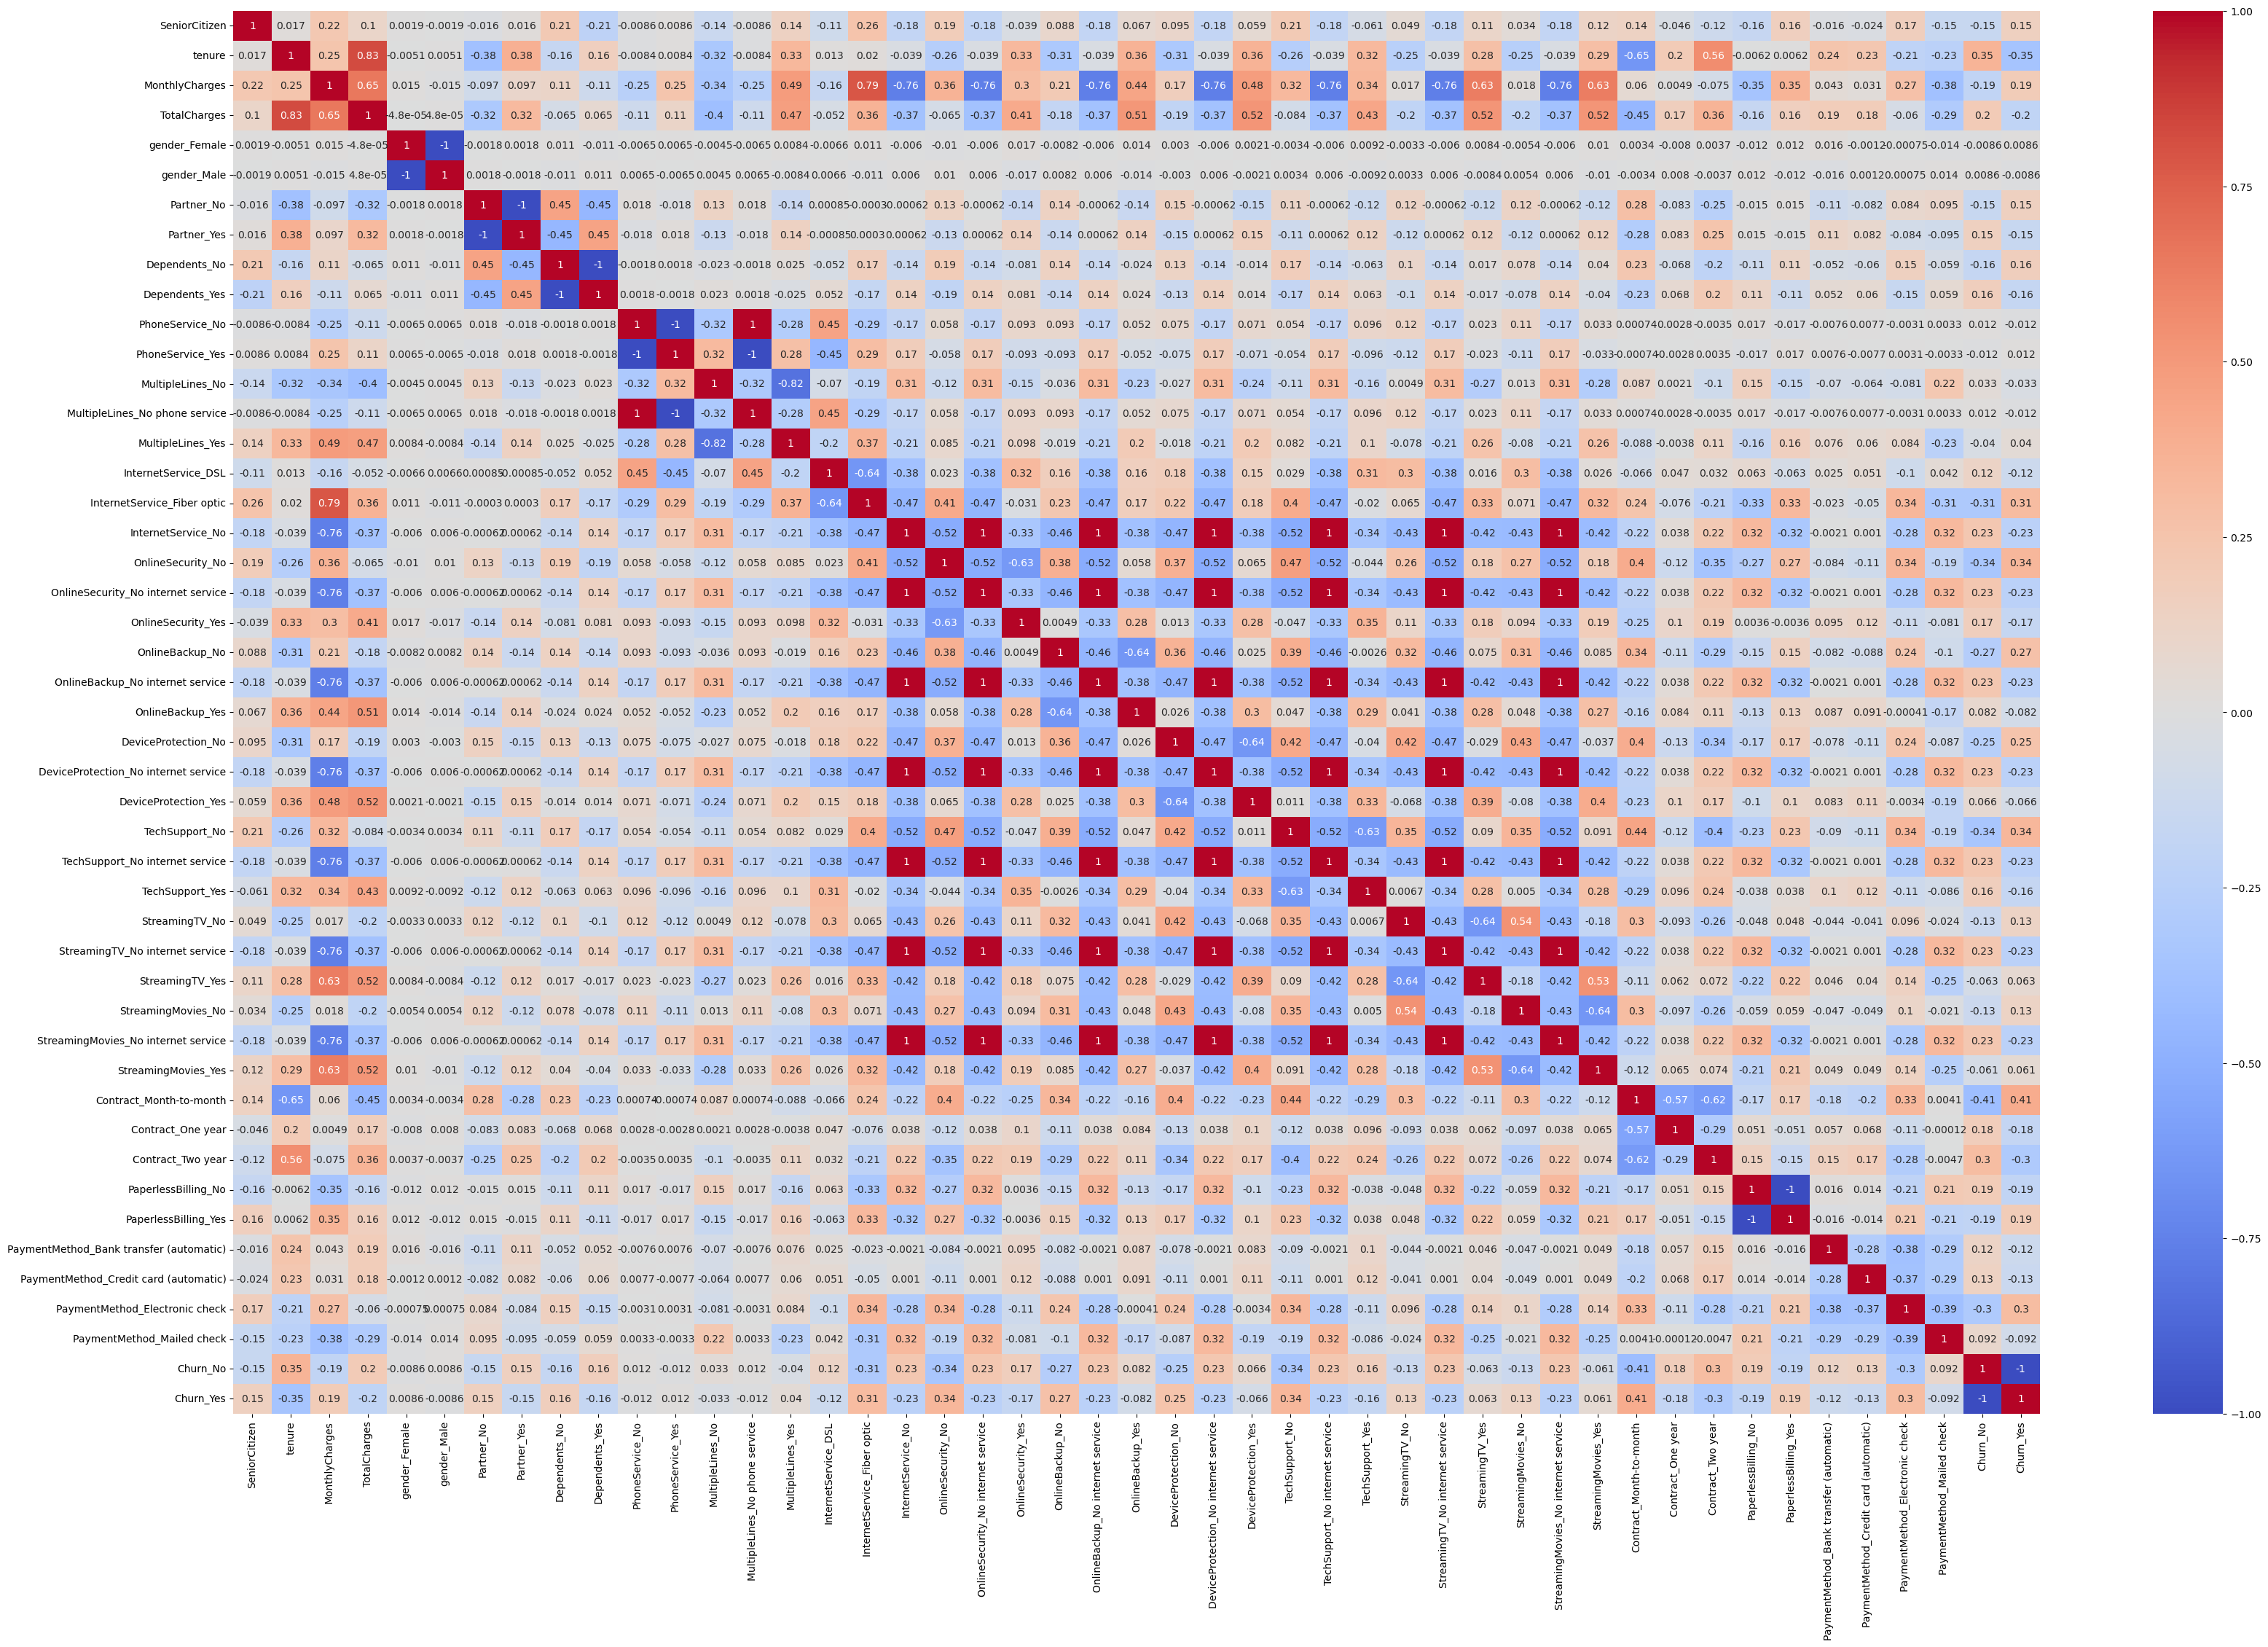

In [17]:
# assuming corr_matrix is your correlation matrix
plt.figure(figsize=(40,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [18]:
#filtering out columns that have a non-negligible correlation with at least one other column in the dataset. i.e positive correlation
#relevant_columns = ['']
#df = df[relevant_columns]

> Balancing classes
- Step 1: Print the counts of the two classes in the original dataset to see if there is a class imbalance issue. If there is an imbalance, the minority class is oversampled using SMOTE (Synthetic Minority Over-sampling Technique). SMOTE generates synthetic samples for the minority class by creating new observations that are combinations of the features of existing minority class observations.

- In the code, X represents the feature matrix and y represents the target variable. SMOTE is applied to the feature and target matrices using the fit_resample() method, which returns new resampled feature and target matrices, X_resampled and y_resampled, respectively.

- Finally, the new class balance is printed to check if the class imbalance issue has been resolved.

In [19]:
print(df.isna().sum())


SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No                   

In [20]:
# Impute missing values with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [21]:
# Check class balance
print(df['Churn_Yes'].value_counts())
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)
#Check new class balance
print(y_resampled.value_counts())



0    5174
1    1869
Name: Churn_Yes, dtype: int64
0    5174
1    5174
Name: Churn_Yes, dtype: int64


In [31]:
# dropping churn no
X_resampled = X_resampled.drop('Churn_No',axis=1)

In [25]:
y_resampled

0        0
1        0
2        1
3        0
4        1
        ..
10343    1
10344    1
10345    1
10346    1
10347    1
Name: Churn_Yes, Length: 10348, dtype: uint8

#### 2. Feature Engineering
- No additional features can be created in this dataframe

#### 3. Exploratory Data Analysis

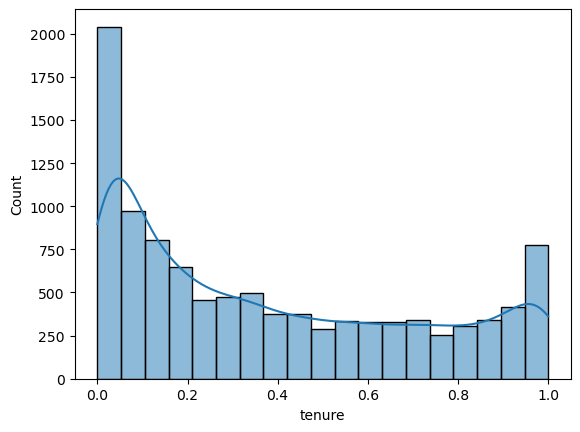

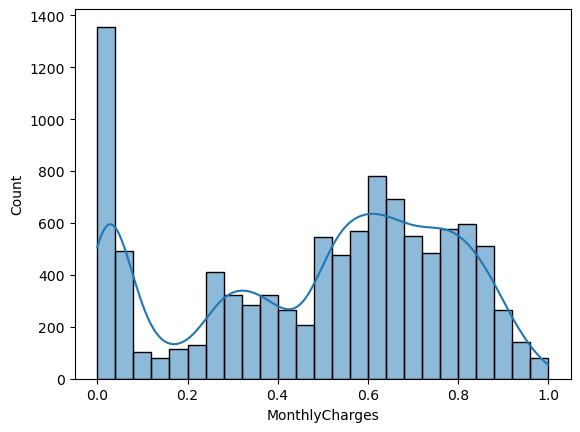

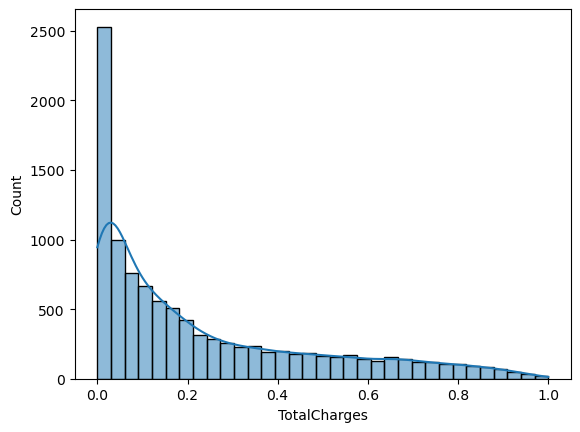

In [29]:
# Visualize the distribution of the numerical variables
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    sns.histplot(x=col, data=X_resampled, kde=True)
    plt.show()


In [32]:
X_resampled.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

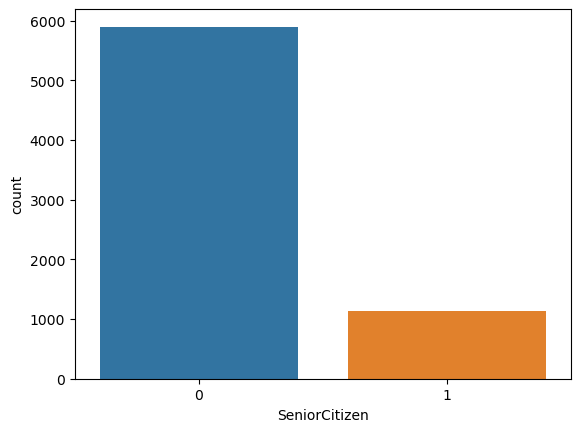

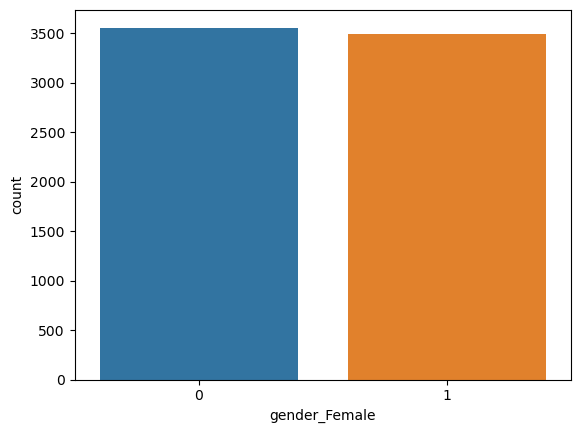

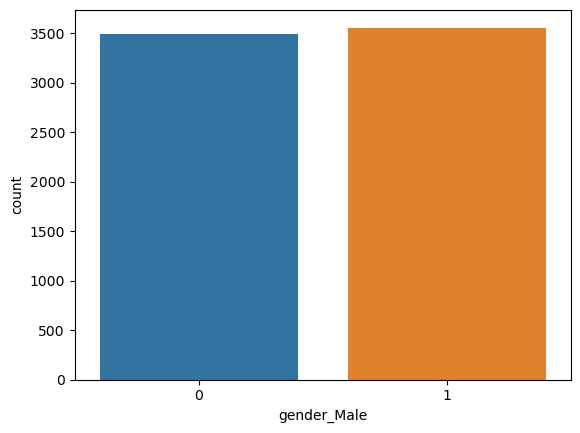

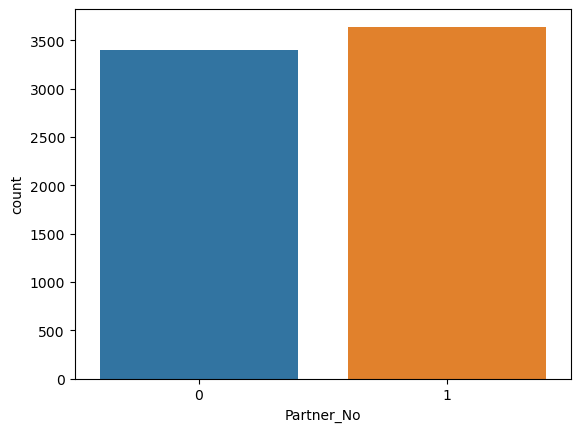

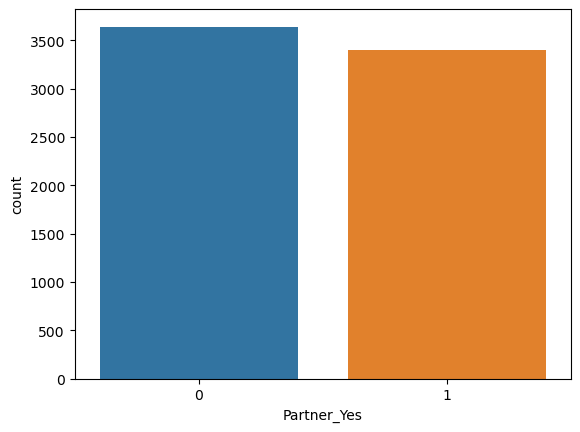

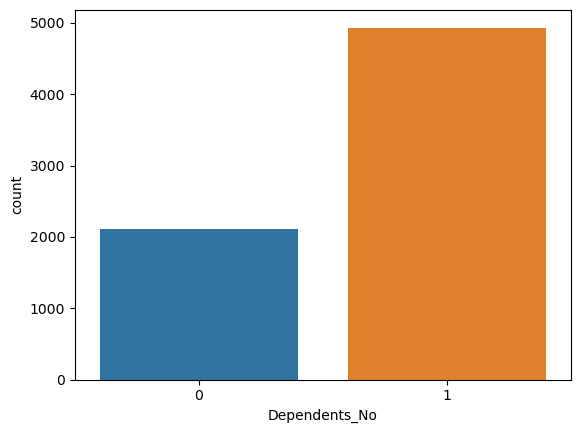

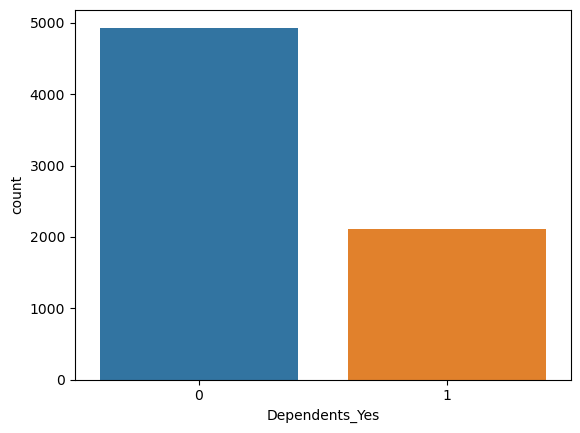

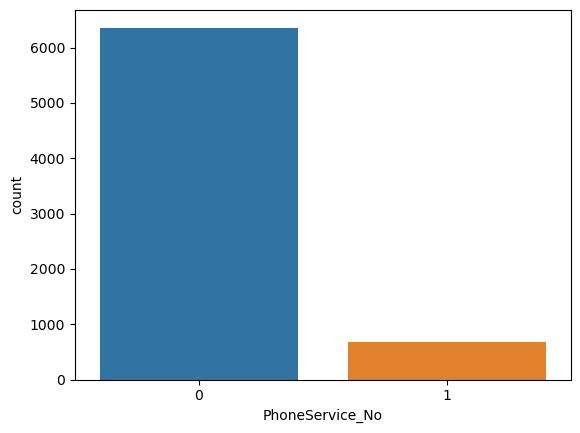

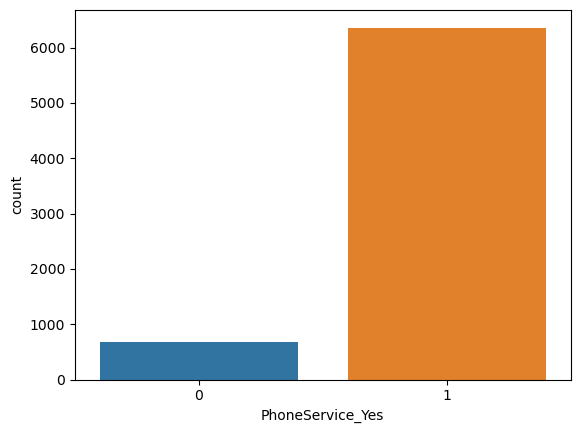

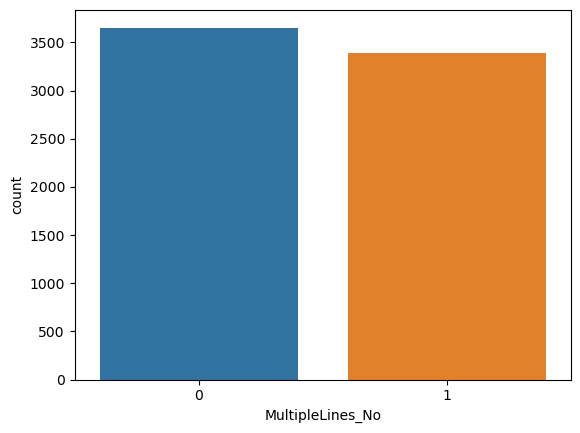

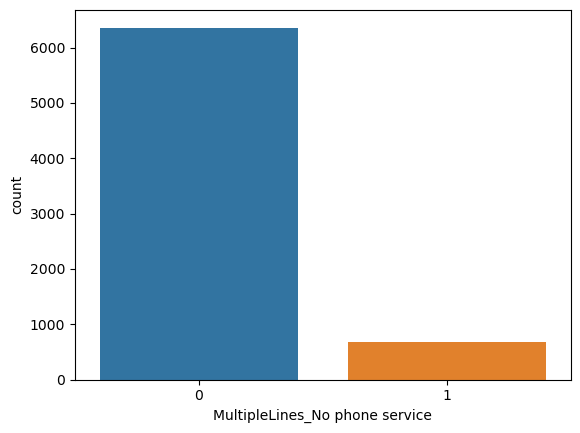

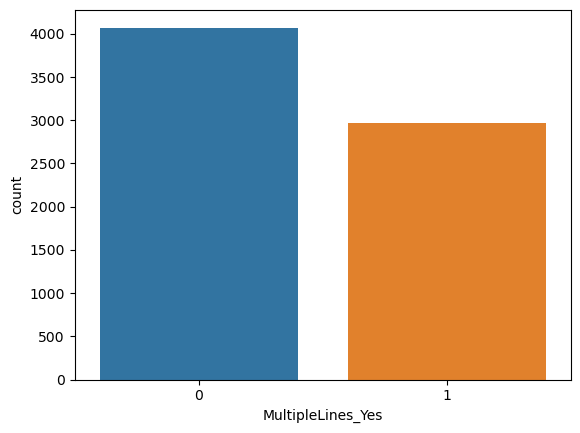

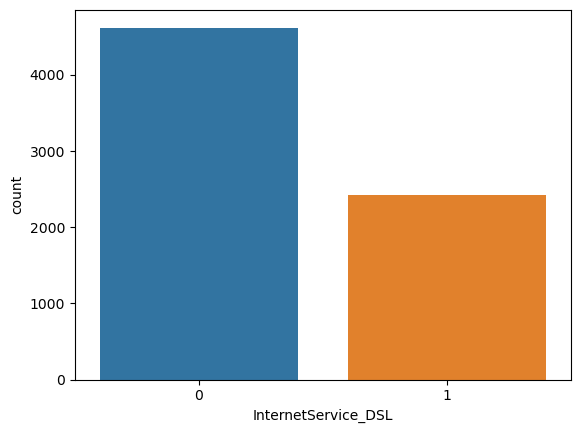

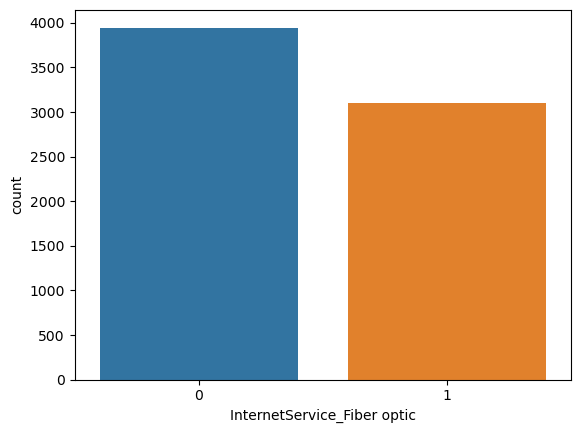

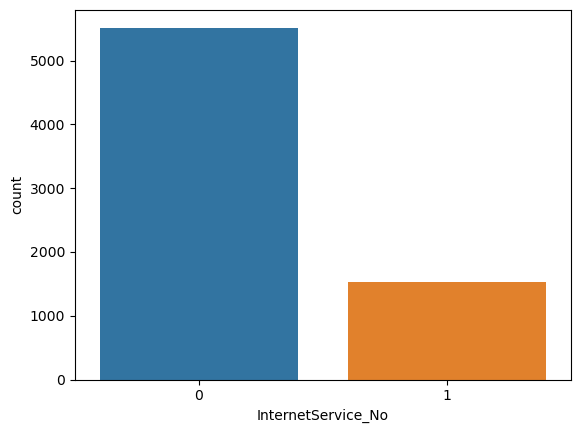

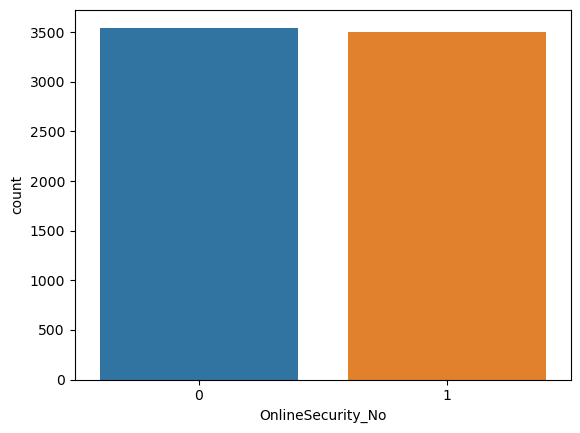

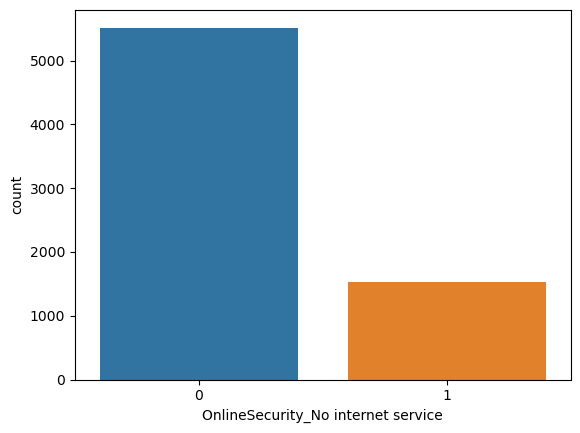

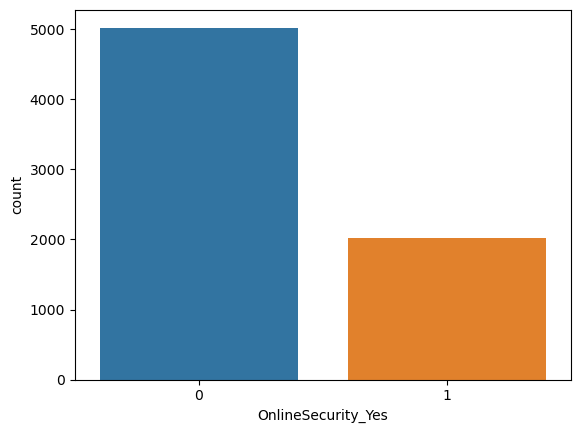

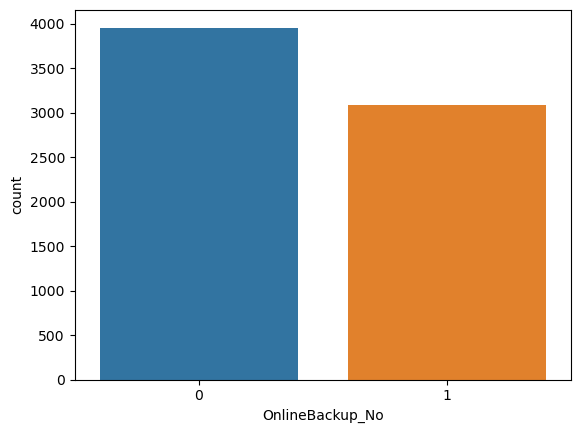

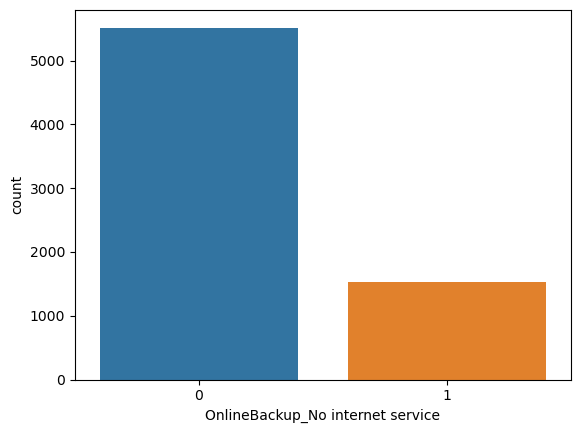

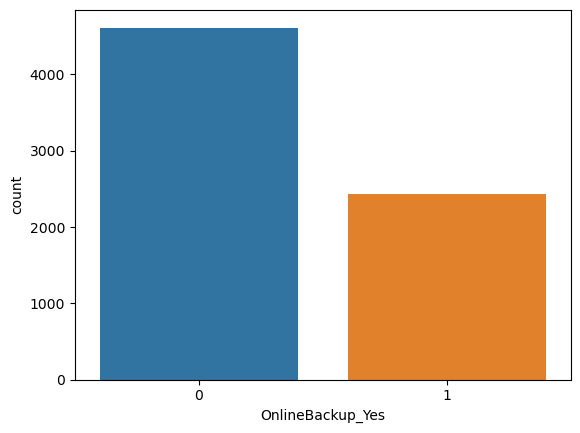

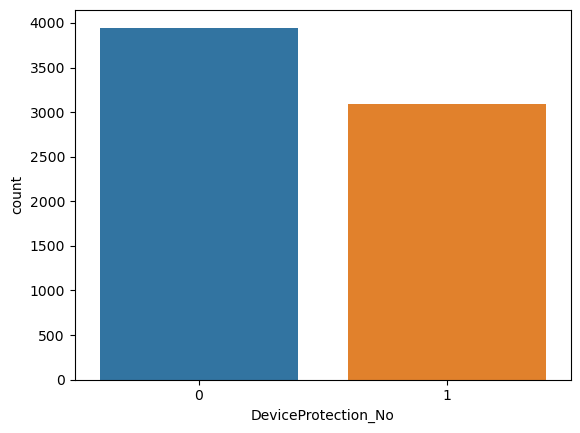

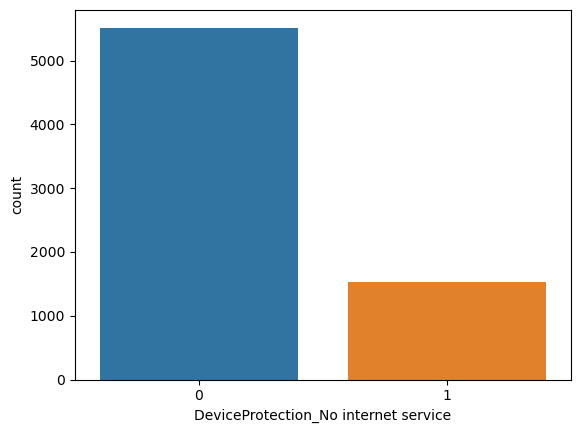

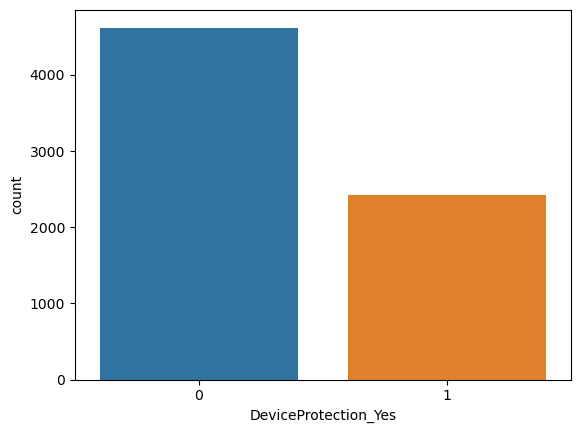

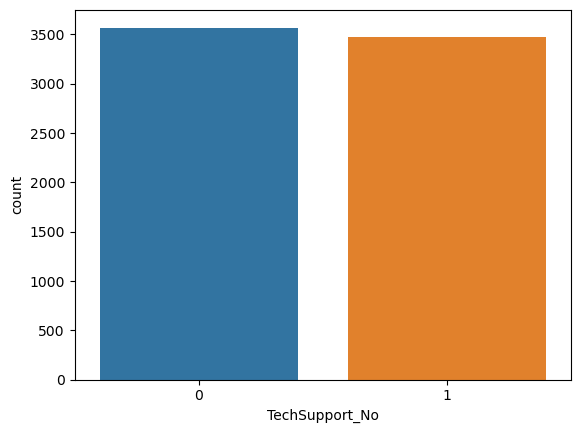

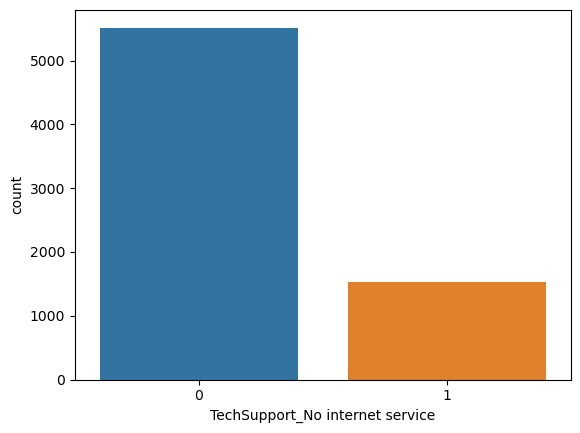

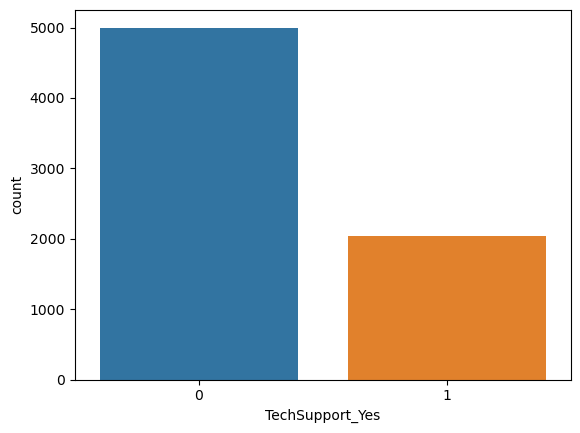

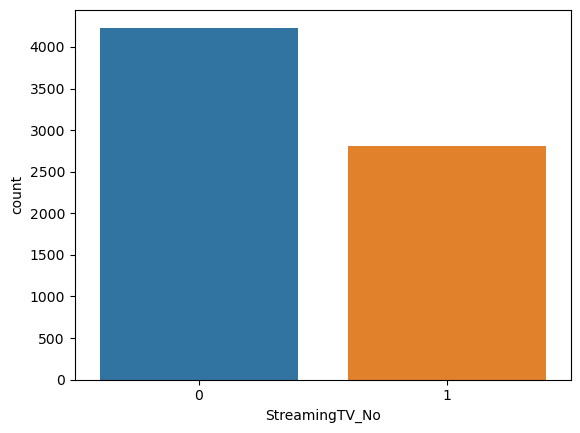

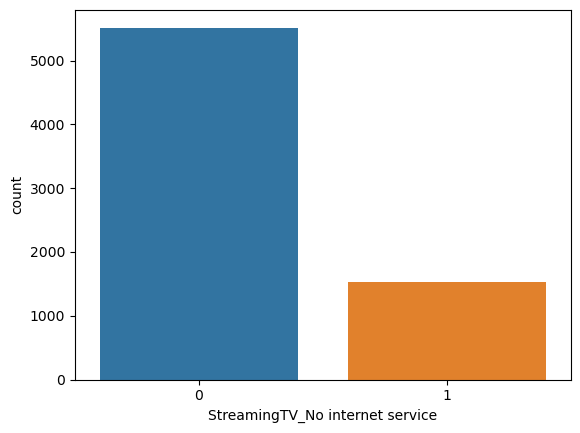

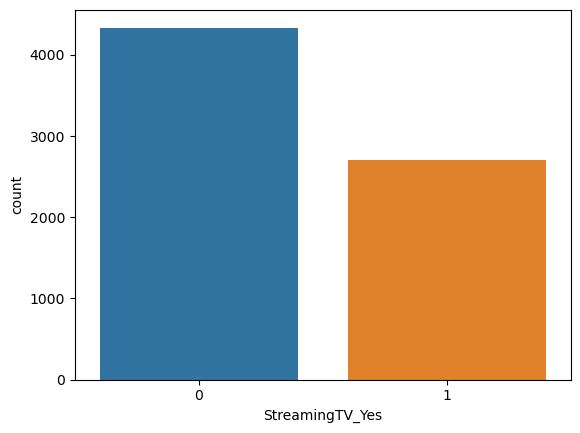

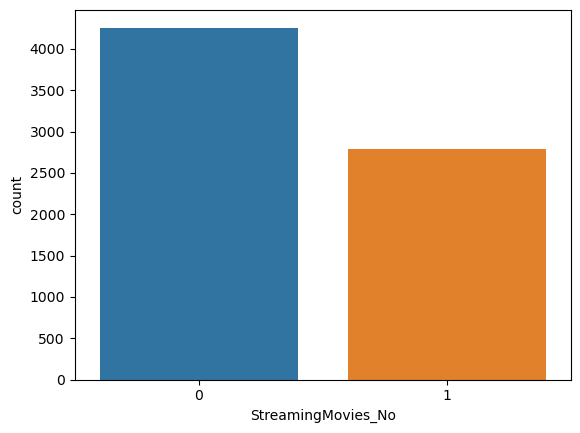

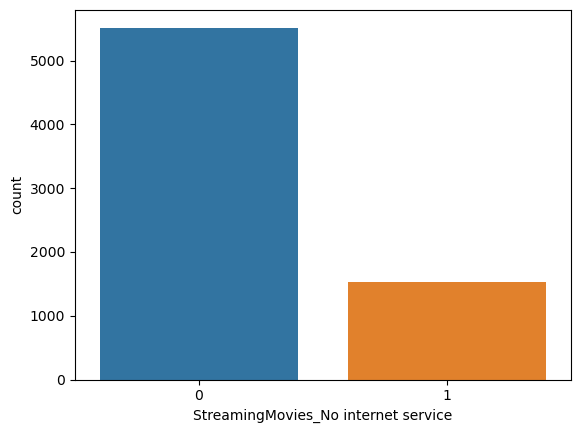

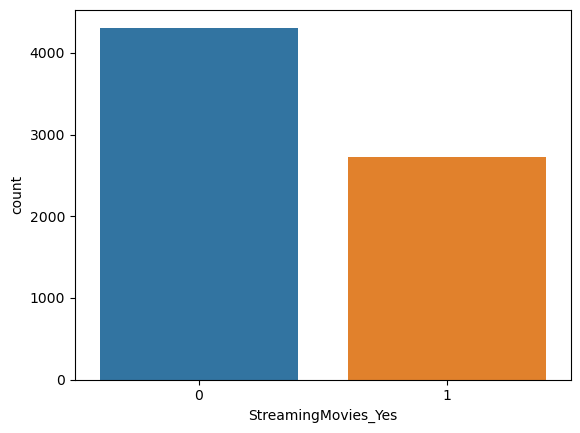

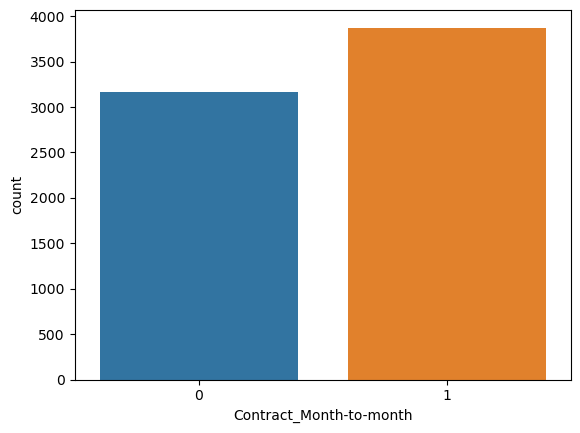

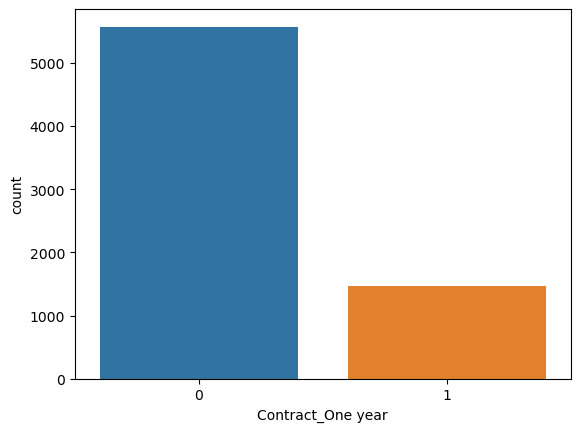

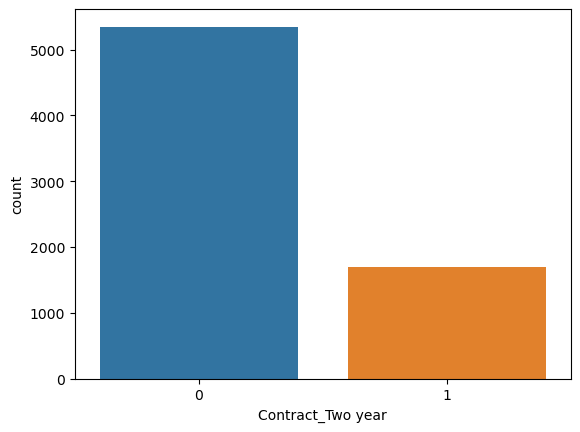

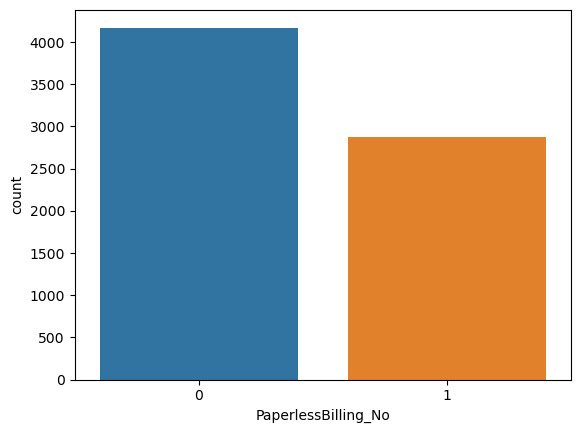

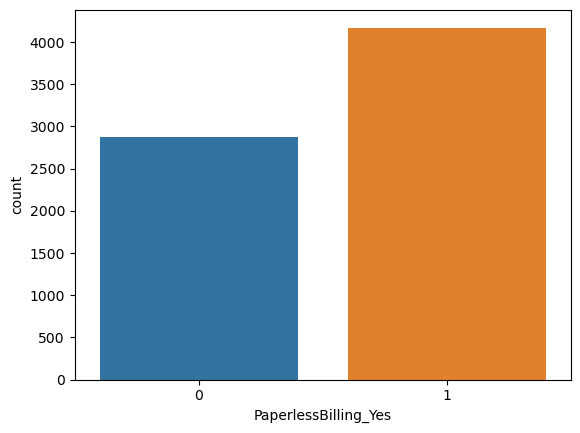

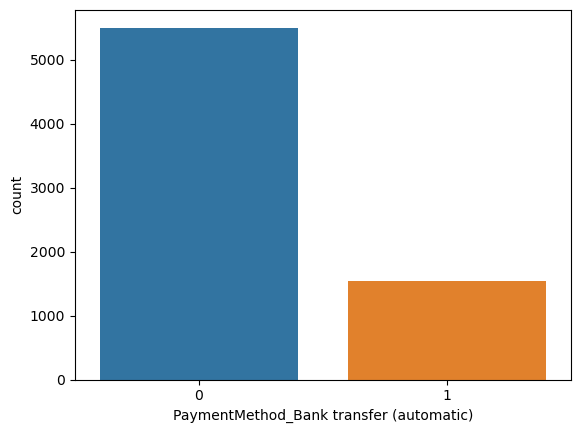

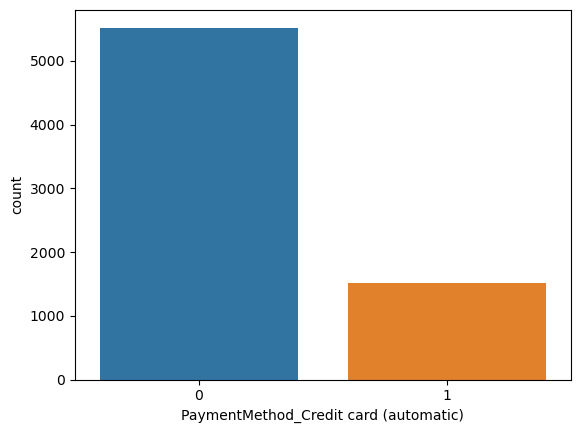

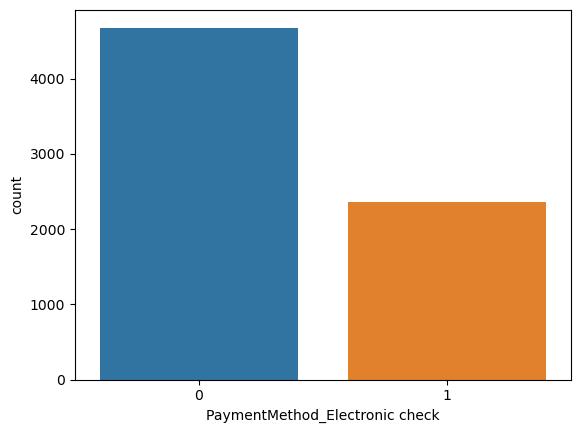

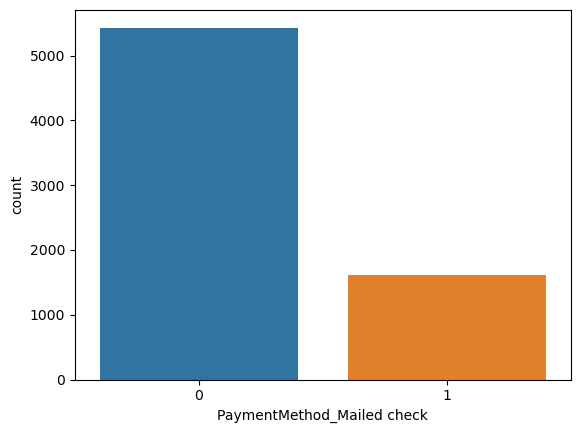

In [33]:

# Visualize the distribution of the categorical variables
cat_cols = ['SeniorCitizen',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.show()

#### 4. Model Selection

In [45]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# logistic regression
lr = LogisticRegression(random_state=42,max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)

# decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)

# random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)

# neural network
nn = MLPClassifier(random_state=42,max_iter=10000)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
nn_acc = accuracy_score(y_test, y_pred)

# print the accuracy scores for each model
print(f"Logistic Regression Accuracy: {lr_acc}")
print(f"Decision Tree Accuracy: {dt_acc}")
print(f"Random Forest Accuracy: {rf_acc}")
print(f"Neural Network Accuracy: {nn_acc}")

Logistic Regression Accuracy: 0.8526570048309179
Decision Tree Accuracy: 0.7922705314009661
Random Forest Accuracy: 0.870048309178744
Neural Network Accuracy: 0.8502415458937198


In [46]:
# Define a function to fit and evaluate each model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training set
    model.fit(X_train, y_train)
    # Predict the labels of the test set
    y_pred = model.predict(X_test)
    # Calculate precision, recall, and F1 score
    report = classification_report(y_test, y_pred)
    # Print the report
    print(f"Model: {type(model).__name__}")
    print(report)


In [47]:
# Evaluate each model
for model in [lr, dt, rf, nn]:
    evaluate_model(model, X_train, y_train, X_test, y_test)

Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1021
           1       0.85      0.86      0.86      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

Model: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1021
           1       0.80      0.79      0.79      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

Model: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1021
           1       0.86      0.89      0.87      1049

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.8

#### 5. Feature Importance
 The most important features that contribute to customer churn are identified using techniques such as permutation feature importance and SHAP values.

In [52]:
# Permutation feature importance
perm = PermutationImportance(rf, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())



Weight,Feature
0.0511 ± 0.0118,tenure
0.0247 ± 0.0045,MonthlyCharges
0.0206 ± 0.0046,TotalCharges
0.0197 ± 0.0039,Contract_Two year
0.0156 ± 0.0037,PaymentMethod_Electronic check
0.0154 ± 0.0044,PaperlessBilling_No
0.0153 ± 0.0048,InternetService_DSL
0.0146 ± 0.0037,OnlineSecurity_Yes
0.0136 ± 0.0064,OnlineSecurity_No
0.0134 ± 0.0076,TechSupport_No


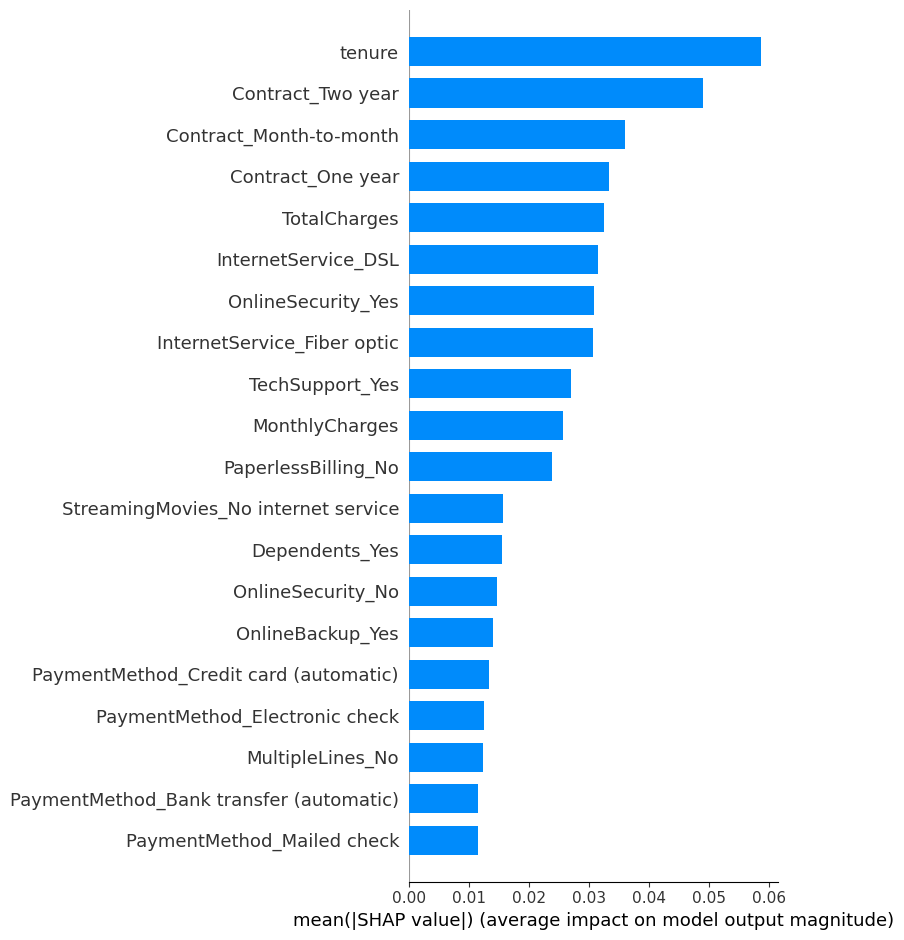

In [53]:
# SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")